<a href="https://colab.research.google.com/github/Deeprajshrivastav/Semester-VI/blob/main/CarPurchasingModel/CarPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DatasetName: [Car_Price_Prediction.csv](https://www.kaggle.com/dev0914sharma/car-purchasing-model)


In [ ]:
# import all the required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/Deeprajshrivastav/Semester-VI/main/CarPurchasingModel/Car_Purchasing_Data.csv")

In [ ]:
data.columns

Index(['Customer Name', 'Customer e-mail', 'Country', 'Gender', 'Age',
       'Annual Salary', 'Credit Card Debt', 'Net Worth',
       'Car Purchase Amount'],
      dtype='object')

In [ ]:
data.shape

(500, 9)

In [ ]:
data.head(5)

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,USA,0,42,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,USA,0,41,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,USA,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,USA,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,USA,1,57,59729.15130,5358.712177,560304.0671,55915.46248


In [ ]:
data.sample(5)

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
119,Dean Snider,tempus@sit.ca,USA,0,35,54355.75950,10008.767970,573052.0119,34521.17618
305,"Ashley, Macon Z.",metus.Vivamus.euismod@arcuVivamus.co.uk,USA,1,50,42003.01617,6052.844775,579220.0393,40022.17406
364,"Valdez, Joy U.",lobortis.quam@velarcueu.org,USA,1,43,66813.66400,15458.688670,600685.1915,49065.16340
459,Kai,velit@molestie.com,USA,0,48,45362.66982,2524.992105,399437.5235,35457.14860
131,Hector Bowers,eget@Morbiquisurna.co.uk,USA,1,45,60575.12604,8088.344365,291360.0291,38243.66481


In [ ]:
data.isnull().sum()
# conclusion: No Null value present in data

Customer Name          0
Customer e-mail        0
Country                0
Gender                 0
Age                    0
Annual Salary          0
Credit Card Debt       0
Net Worth              0
Car Purchase Amount    0
dtype: int64

In [ ]:
data.describe()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.224000,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.990339,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,41.000000,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.000000,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,52.000000,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


In [ ]:
len(data['Customer Name'].unique())
# Unique value in 'Customer Name' is 498

498

In [ ]:
len(data['Customer e-mail'].unique())
# Unique value in 'Customer e-mail' is 500

500

In [ ]:
len(data['Country'].unique())
# conclusion: Country has only one unique value

1

In [ ]:
# Drop non usable variable(Customer Name, Customer e-mail, Country)
data.drop(['Customer Name', 'Customer e-mail', 'Country'], axis=1, inplace=True)

# After drop the columns
data.sample(5)

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
180,1,50,57770.36488,8628.434025,211765.2494,38763.11306
164,0,47,57860.53103,7146.192574,445745.5544,42484.02283
102,1,30,68289.18229,7357.787011,404457.3099,33640.73697
63,0,53,54006.77851,15189.088450,246321.8916,40093.61981
234,1,39,55285.98625,17462.075060,734443.6969,42990.29255


Number of Female:  247
Number of Male:  253


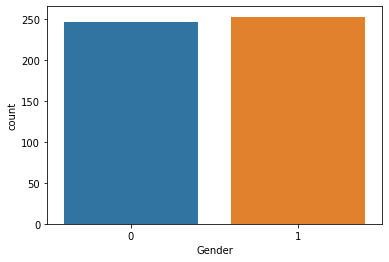

In [ ]:
# count plot Gender columns
sns.countplot(data['Gender'])
print("Number of Female: ", data[data.Gender==0].shape[0])
print("Number of Male: ", data[data.Gender==1].shape[0])

In [ ]:
print("Mean age of Female: ", data[data['Gender']==0]["Age"].mean())
print("Mean age of Male: ", data[data['Gender']==1]["Age"].mean())

Mean age of Female:  46.76113360323887
Mean age of Male:  45.69960474308301


In [ ]:
print("Mean Annual Salary of Female: ", data[data['Gender']==0]["Annual Salary"].mean())
print("Mean Annual Salary of Male: ", data[data['Gender']==1]["Annual Salary"].mean())

Mean Annual Salary of Female:  62559.12831267206
Mean Annual Salary of Male:  61705.59332233203


### Correlation HeatMap

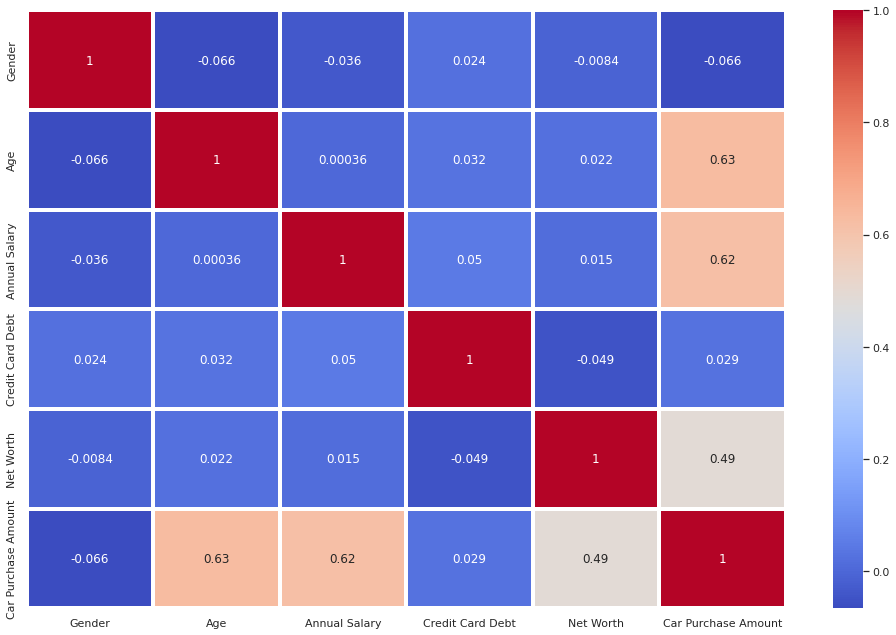

In [ ]:
sns.set(rc={'figure.figsize':(17, 11)})

# Correlation Heatmap
sns.heatmap(data.corr(), cmap="coolwarm", annot=True, linewidths=3)
# conclusion: Most important variable to predict car purchase amount: 'Age', 'Annual Salary'
# conclusion: Less important variable to predict car purchase amount:  'Gender

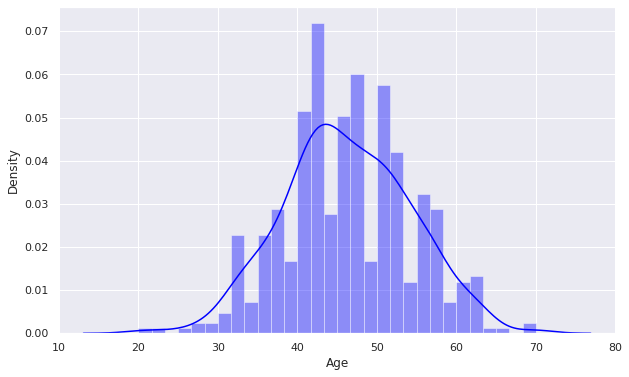

In [ ]:
sns.set(rc={'figure.figsize':(10, 6)})
sns.distplot(data['Age'], kde = True, color ='blue', bins = 30)

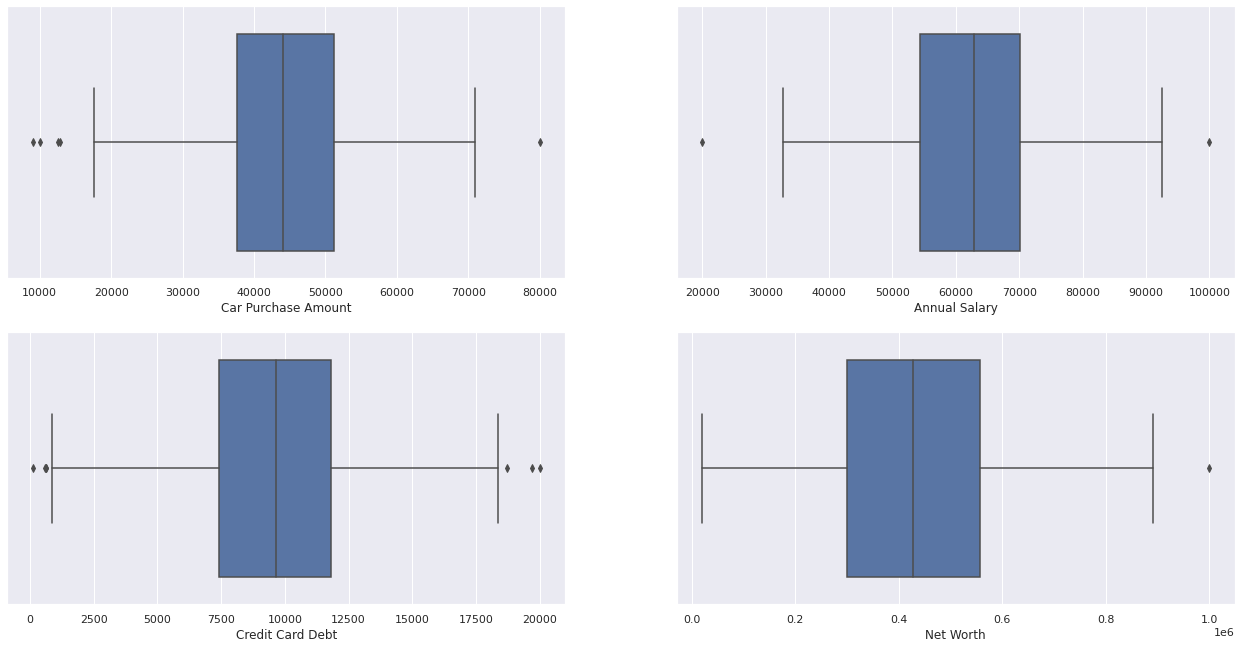

In [ ]:
fig, axs = plt.subplots(2,2, figsize = (22,11))
plt1 = sns.boxplot(data['Car Purchase Amount'], ax = axs[0,0])
plt2 = sns.boxplot(data['Annual Salary'], ax = axs[0,1])
plt3 = sns.boxplot(data['Credit Card Debt'], ax = axs[1,0])
plt4 = sns.boxplot(data['Net Worth'], ax = axs[1,1])

# conclusion: 
# 1. In Age: 4 outlier present
# 2. In Annual Salary: 2 outlier present
# 3. Credit Card Debt: 5 outlier present
# 4. Net Worth: 1 outlier present

## Outlier Treatment

Outlier: 
 

*   An outlier is a data point in a data set that is distant from all other.
*   A data point that lies outside the overall distribution of dataset

**Step to identify Outlier**  <br>


*   Step1: calculate the 1st and 3rd quartiles(Q1, Q3)
*   Step2: compute IQR=Q3-Q1
*   Step3: compute lower bound = (Q1–1.5*IQR), upper bound = (Q3+1.5*IQR)
*   Step4: If datapoint is less than lowerBound and greater than upperBound is outlier

**we can also identify outlier with BoxPlot**
<br><br>
**Method of outlier treatment**



*   if data point is less than lowerBound then replace with lowerBound.
*   if data point is greater than UpperBound then replace with UpperBound.




<br><br><br>

### For Age

In [ ]:
# Outlier TreatMent For age
Q3 = data.Age.quantile(0.75)          # 75 Quantile radius_se data   
Q1 = data.Age.quantile(0.25)          # 25 Quantile radius_se data

IQR = Q3 - Q1

# lowerBound = (Q1–1.5*IQR)
lowerBound = Q1 - 1.5 * IQR

# upperBound = (Q3+1.5*IQR)
upperBound = Q3+1.5*IQR

lowerBoundData = data['Age'] < lowerBound
upperBoundData = data['Age'] > upperBound

print("Outlier in age Column: ")
data[(lowerBound > data["Age"]) | (data["Age"] > upperBound)]

Outlier in age Column: 


,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
37,1,22,43131.78411,10917.140940,326742.7352,10092.22509
194,0,70,52323.24480,12438.856480,346555.1716,56229.41270
236,1,70,41434.51258,6810.555606,252220.2937,47009.57741
444,1,20,70467.29492,100.000000,494606.6334,28645.39425


In [ ]:
# Replacing lowerBound outlier with lowerBound and upperBound outlier with upperBound
data['Age'][(data['Age'] < lowerBound)] = lowerBound
data['Age'][(data['Age'] > upperBound)] = upperBound

# After removing outlier from Age
data[(lowerBound > data["Age"]) | (data["Age"] > upperBound)]

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount


### for Annual Salary

In [ ]:
# Outlier TreatMent For Annual Salary
Q3 = data['Annual Salary'].quantile(0.75)          # 75 Quantile radius_se data   
Q1 = data['Annual Salary'].quantile(0.25)          # 25 Quantile radius_se data

IQR = Q3 - Q1

# lowerBound = (Q1–1.5*IQR)
lowerBound = Q1 - 1.5 * IQR

# upperBound = (Q3+1.5*IQR)
upperBound = Q3+1.5*IQR

lowerBoundData = data['Annual Salary'] < lowerBound
upperBoundData = data['Annual Salary'] > upperBound

print("Outlier in Annual Salary: ")
data[(lowerBound > data["Annual Salary"]) | (data["Annual Salary"] > upperBound)]

Outlier in Annual Salary: 


,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
28,1,46.0,100000.0,17452.92179,188032.0778,58350.31809
89,1,32.0,20000.0,14261.80773,579181.6552,12895.71468


In [ ]:
# Replacing lowerBound outlier with lowerBound and upperBound outlier with upperBound
data['Annual Salary'][(data['Annual Salary'] < lowerBound)] = lowerBound
data['Annual Salary'][(data['Annual Salary'] > upperBound)] = upperBound

# After removing outlier from Annual Salary
data[(lowerBound > data["Annual Salary"]) | (data["Annual Salary"] > upperBound)]

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount


### For Credit Card Debt

In [ ]:
# Outlier TreatMent For age
Q3 = data['Credit Card Debt'].quantile(0.75)          # 75 Quantile radius_se data   
Q1 = data['Credit Card Debt'].quantile(0.25)          # 25 Quantile radius_se data

IQR = Q3 - Q1

# lowerBound = (Q1–1.5*IQR)
lowerBound = Q1 - 1.5 * IQR

# upperBound = (Q3+1.5*IQR)
upperBound = Q3+1.5*IQR

# Print all outlier
print("Credit Card Debt in age Column: ")
data[(lowerBound > data["Credit Card Debt"]) | (data["Credit Card Debt"] > upperBound)]

Credit Card Debt in age Column: 


,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
221,1,36.0,69494.69783,20000.000000,335809.6171,37303.56701
239,1,45.0,62939.12851,632.052852,455589.7973,44434.98419
253,1,46.0,55434.04046,18693.146520,316906.6441,37093.92033
290,0,63.0,46549.16329,640.045378,626163.8320,55543.38497
440,1,40.0,57777.15558,19692.912620,601210.2803,41147.46679
444,1,24.5,70467.29492,100.000000,494606.6334,28645.39425
488,0,42.0,61575.95020,594.804949,497197.2640,41984.62412


In [ ]:
# Replacing lowerBound outlier with lowerBound and upperBound outlier with upperBound
data['Credit Card Debt'][(data['Credit Card Debt'] < lowerBound)] = lowerBound
data['Credit Card Debt'][(data['Credit Card Debt'] > upperBound)] = upperBound

# After removing outlier from Annual Salary
data[(lowerBound > data["Credit Card Debt"]) | (data["Credit Card Debt"] > upperBound)]

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount


### Net Worth

In [ ]:
# Outlier TreatMent For age
Q3 = data['Net Worth'].quantile(0.75)          # 75 Quantile radius_se data   
Q1 = data['Net Worth'].quantile(0.25)          # 25 Quantile radius_se data

IQR = Q3 - Q1

# lowerBound = (Q1–1.5*IQR)
lowerBound = Q1 - 1.5 * IQR

# upperBound = (Q3+1.5*IQR)
upperBound = Q3+1.5*IQR

print("Net Wortht in age Column: ")
data[(lowerBound > data["Net Worth"]) | (data["Net Worth"] > upperBound)]

Net Wortht in age Column: 


,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
315,1,55.0,83333.81054,9874.075327,1000000.0,80000.0


In [ ]:
# Replacing lowerBound outlier with lowerBound and upperBound outlier with upperBound
data['Net Worth'][(data['Net Worth'] < lowerBound)] = lowerBound
data['Net Worth'][(data['Net Worth'] > upperBound)] = upperBound

# After removing outlier from Annual Salary
data[(lowerBound > data["Net Worth"]) | (data["Net Worth"] > upperBound)]

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount


### After removing all the outlier

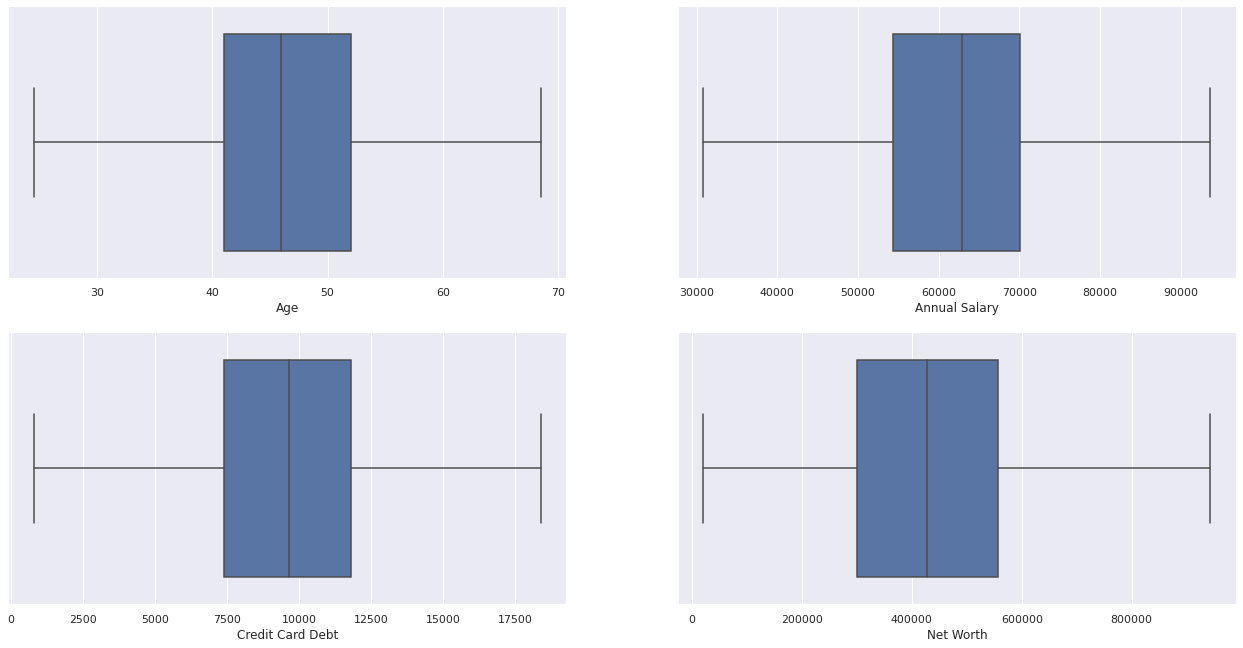

In [ ]:
fig, axs = plt.subplots(2,2, figsize = (22,11))
plt1 = sns.boxplot(data['Age'], ax = axs[0,0])
plt2 = sns.boxplot(data['Annual Salary'], ax = axs[0,1])
plt3 = sns.boxplot(data['Credit Card Debt'], ax = axs[1,0])
plt4 = sns.boxplot(data['Net Worth'], ax = axs[1,1])

### Splitting the dataset

In [ ]:
# dependentVariable: "Car Purchase Amount"
dependentVariable = "Car Purchase Amount"

X = data.drop([dependentVariable], axis=1)
y = data[dependentVariable]

# splitting the dataset into train(80%) and test(20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## LinearRegression


*   Linear regression attempts to model the relationship between two variables by fitting a linear equation to observed data. One variable is considered to be an dependent variable, and the other is considered to be a Independent variable.


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)        # Train the model

LinearRegression()

### Mean square error
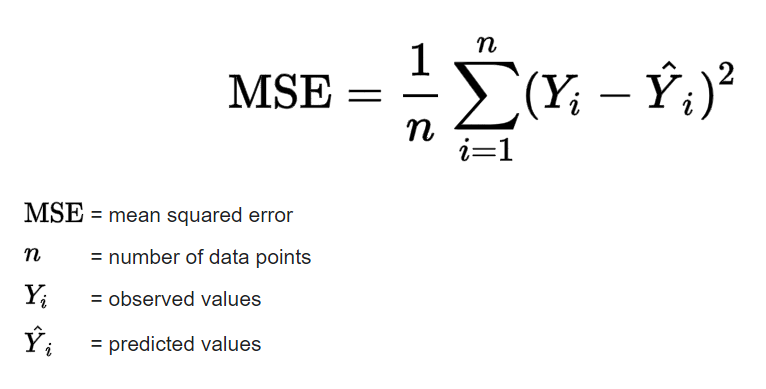

In [ ]:
print("Mean squared error for test data: ", mean_squared_error(y_test, model.predict(X_test)))
print("Mean squared error for train data: ", mean_squared_error(y_train, model.predict(X_train)))
print("Mean squared error for all data: ", mean_squared_error(y, model.predict(X)))

Mean squared error for test data:  84227.43225277487
Mean squared error for train data:  225679.38381970525
Mean squared error for all data:  197388.99350631918


### RMSE: Root mean squared error
RMSE = MSE^1/2

In [ ]:
print("Root Mean squared error for test data: ", sqrt(mean_squared_error(y_test, model.predict(X_test))))
print("Root Mean squared error for train data: ", sqrt(mean_squared_error(y_train, model.predict(X_train))))
print("Root Mean squared error for all data: ", sqrt(mean_squared_error(y, model.predict(X))))

Root Mean squared error for test data:  290.2196276146306
Root Mean squared error for train data:  475.05724267682234
Root Mean squared error for all data:  444.28481124872945


### R sqaure
R-Squared is a statistical measure of fit that indicates how much variation of a dependent variable is explained by the independent variable(s) in a regression model.

In [ ]:
print("Score for test data: ", model.score(X_test, y_test))
print("Score for train data: ", model.score(X_train, y_train))
print("Score for all data: ", model.score(X, y))

Score for test data:  0.9992199225008193
Score for train data:  0.9980784334148968
Score for all data:  0.9982958623945656
